### Set up the right directory for importing modules

In [4]:
import matplotlib.pyplot as plt #to remove later 
import sys
from pathlib import Path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [5]:
import src.CA_model as CA
import src.analysis as an
import time
import matplotlib.pyplot as plt
import numpy as np
import importlib

In [6]:
# run to reload CA_model.py and analysis.py for updated code
importlib.reload(CA)
importlib.reload(an)

<module 'src.analysis' from 'C:\\Users\\lilaw\\OneDrive\\Documents\\Amsterdam\\Computational Science\\Period 3 - complex systems\\CA-project\\src\\analysis.py'>

#### Parameter settings

In [7]:
size = 100                          # width and height of the grid
p = 0.5                             # starting fraction of vegetation
update_rule = CA.update_Scanlon2007 # function containing update rule
true_frac=0.2                       # 'natural' (equilibrium) fraction of vegetation
k=3                                 # strength of local interactions
M=20                                # radius of neighborhood
N_steps=200                         # number of iterations
skip=0                              # iterations to skip (equilibration period)

#### Generate grids for analysis

In [8]:
grids = CA.evolve_CA(
    size=size,
    p=p,
    update_rule=update_rule,
    true_frac=true_frac,
    k=k,
    M=M,
    N_steps=N_steps,
    skip=skip,
)

#### Plot starting and final grid

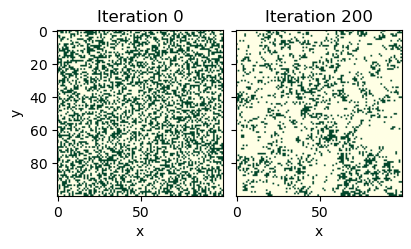

In [9]:
an.show_grids([grids[0], grids[-1]], [skip, N_steps])

#### Plot cluster size distribution

In [ ]:
size_list, fit = an.cluster_sizes(grids[100:]) #take only grids after 100 iterations
beta = fit.truncated_power_law.alpha #truncated power law to that distribution
s_char = 1 / (fit.truncated_power_law.Lambda)
R, p = fit.distribution_compare("truncated_power_law", "exponential")

print("Scaling exponent: ", beta)
print("Characteristic length: ", s_char) #typical max cluster size before exponential cutoff
print("R: ", R)
print("p?: ", p)

Scaling exponent:  1.7244684704518332
Characteristic length:  19.290301867188003
R:  14444.516634093194
p?:  0.0


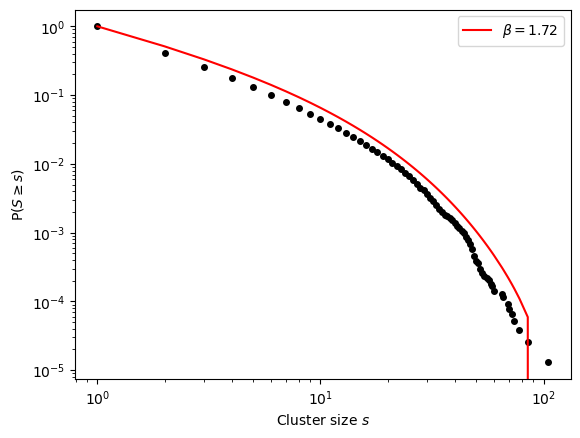

In [ ]:
an.plot_cluster_size_distr(size_list=size_list, fit=fit) #Cumulative distirbution

## Averaging over several datasets

In [12]:
size = 200                          # width and height of the grid
p = 0.5                             # starting fraction of vegetation
update_rule = CA.update_Scanlon2007 # function containing update rule
true_frac=0.2                       # 'natural' (equilibrium) fraction of vegetation
k=3                                 # strength of local interactions
M=20                                # radius of neighborhood
N_steps=200                         # number of iterations
skip=100                            # iterations to skip (equilibration period)

N_evolutions = 5                    # number of full evolutions to generate for this set of parameters
all_grids = []

for seed in range(N_evolutions):
    start = time.time()
    grids = CA.evolve_CA(
        size=size,
        p=p,
        update_rule=update_rule,
        true_frac=true_frac,
        k=k,
        M=M,
        N_steps=N_steps,
        skip=skip,
        seed=seed,
    )
    all_grids.append(grids)
    end = time.time()
    print(f"Grid evolution {seed+1} out of {N_evolutions} completed in {end-start} seconds.")


Grid evolution 1 out of 5 completed in 31.53227400779724 seconds.
Grid evolution 2 out of 5 completed in 30.921753883361816 seconds.
Grid evolution 3 out of 5 completed in 35.643781900405884 seconds.
Grid evolution 4 out of 5 completed in 47.01599407196045 seconds.
Grid evolution 5 out of 5 completed in 29.160115957260132 seconds.


In [13]:
# flatten the list of lists into a 1D list of grids
combined_grids = [grid for grid_list in all_grids for grid in grid_list]

In [14]:
size_list, fit = an.cluster_sizes(combined_grids)
beta = fit.truncated_power_law.alpha
s_char = 1 / (fit.truncated_power_law.Lambda)
R, p = fit.distribution_compare("truncated_power_law", "exponential")

print("Scaling exponent: ", beta)
print("Characteristic length: ", s_char)
print("R: ", R)
print("p?: ", p)

Scaling exponent:  1.7307392589759478
Characteristic length:  21.42887409388489
R:  301555.7021885668
p?:  0.0


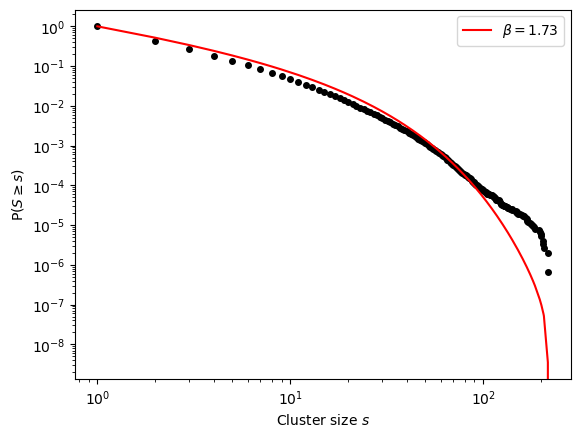

In [15]:
an.plot_cluster_size_distr(size_list=size_list, fit=fit)

## Scalon rule with different weight on the local and global rule 


Running Scalon_exp with phi = 0.0
Evolution 1/5 completed in  40.28 s'
Evolution 2/5 completed in  50.48 s'
Evolution 3/5 completed in  57.32 s'
Evolution 4/5 completed in  47.42 s'
Evolution 5/5 completed in  46.51 s'


c:\Users\lilaw\anaconda3\Lib\site-packages\powerlaw\distributions.py:743: OptimizeWarning: Initial guess is not within the specified bounds
  result = scipy.optimize.minimize(fit_function,


 beta = 1.364
 s_char = 1.185
 R = 8394.185, p = 0.000


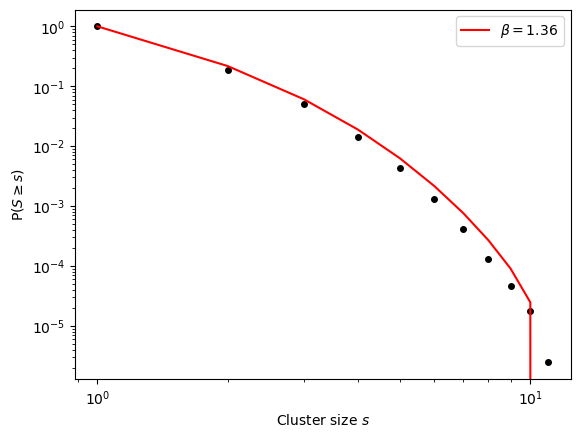


Running Scalon_exp with phi = 0.25
Evolution 1/5 completed in  49.63 s'
Evolution 2/5 completed in  46.57 s'
Evolution 3/5 completed in  45.60 s'
Evolution 4/5 completed in  38.34 s'
Evolution 5/5 completed in  29.11 s'
 beta = 1.735
 s_char = 22.146
 R = 305995.845, p = 0.000


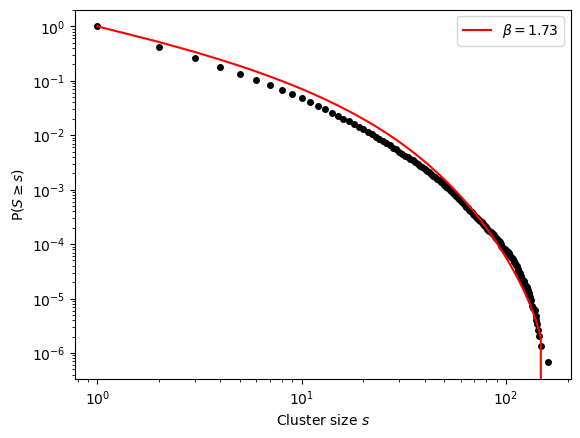


Running Scalon_exp with phi = 0.5
Evolution 1/5 completed in  45.24 s'
Evolution 2/5 completed in  42.61 s'
Evolution 3/5 completed in  34.13 s'
Evolution 4/5 completed in  31.04 s'
Evolution 5/5 completed in  31.88 s'
 beta = 1.727
 s_char = 21.915
 R = 303181.879, p = 0.000


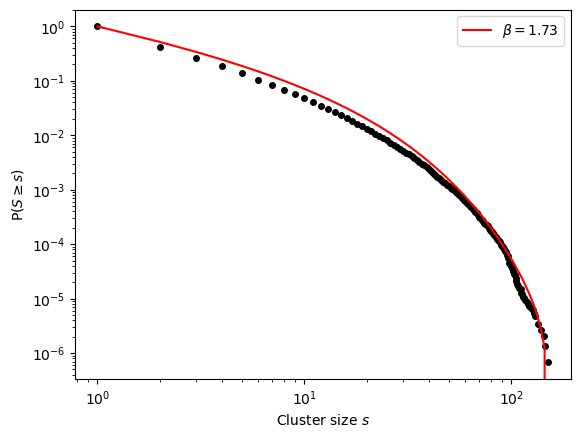


Running Scalon_exp with phi = 0.75
Evolution 1/5 completed in  35.61 s'
Evolution 2/5 completed in  30.54 s'
Evolution 3/5 completed in  57.95 s'
Evolution 4/5 completed in  71.49 s'
Evolution 5/5 completed in  69.07 s'
 beta = 1.722
 s_char = 21.408
 R = 299747.403, p = 0.000


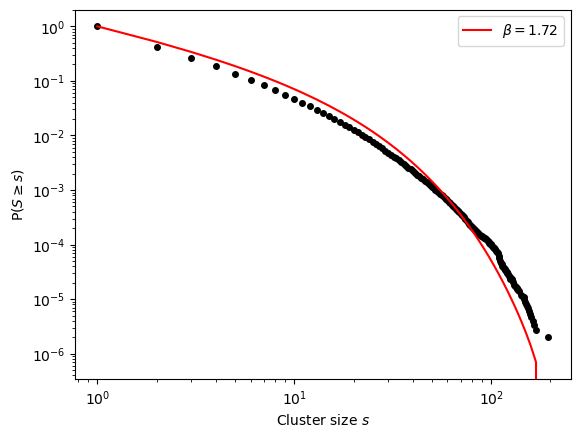


Running Scalon_exp with phi = 1
Evolution 1/5 completed in  64.69 s'
Evolution 2/5 completed in  69.65 s'
Evolution 3/5 completed in  68.22 s'
Evolution 4/5 completed in  78.94 s'
Evolution 5/5 completed in  85.43 s'
 beta = 1.733
 s_char = 22.058
 R = 303931.697, p = 0.000


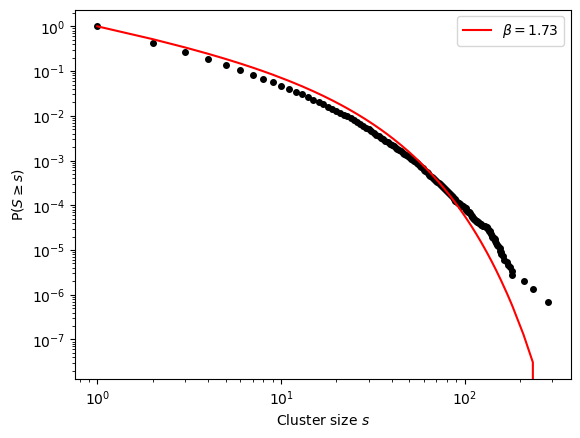

In [ ]:
"""
Difference rules weight """

#add how it should look like on a grid 

update_rule = CA.update_Scanlon2007 # function containing update rule
phi_values = [0.0, 0.25, 0.5, 0.75, 1] #the different weight of the local rule 
results = {}

for phi in phi_values: 
    print(f"\nRunning Scalon_exp with phi = {phi}")
    all_grids = []

    for seed in range(N_evolutions): #we run 5 independent CA evolutions for each phi
        start = time.time() #function that returns the time until another point, measure performance 
        grids = CA.evolve_CA(
            size = size, 
            p = p, 
            update_rule = CA.update_Scanlon_exp, 
            true_frac=true_frac, 
            k=k,
            M = M, 
            N_steps = N_steps, #the only parameter that changes 
            skip = skip,
            seed = seed , 
            phi = phi
        )
        all_grids.append(grids)
        end = time.time()
        print(f"Evolution {seed+1}/{N_evolutions} completed in {end-start: .2f} s'")

    #Flatten all grids
    combined_grids = [g for grid_list in all_grids for g in grid_list] #this is only used to analayse the different grids but putting them next to each other? 

    #Compute cluster sizes and fit 
    size_list, fit = an.cluster_sizes(combined_grids) #size_list gives a list of all cluster sizes, and fit models the distribution 
    results[phi] = (size_list, fit)

    #Print parameters
    beta = fit.truncated_power_law.alpha 
    s_char = 1 /fit.truncated_power_law.Lambda
    R, p_val = fit.distribution_compare("truncated_power_law", "exponential") # these are just statistical test to compare the 2 model, if R>0 -> the truncated power law fits better, if p<0.05 then the difference between the fit of the 2 models is statistically significant 

    print(f" beta = {beta:.3f}") 
    print(f" s_char = {s_char:.3f}") 
    print(f" R = {R:.3f}, p = {p_val:.3f}") 
    
    # Plot 
    an.plot_cluster_size_distr(size_list, fit)

